# Bank Marketing Term Deposit Subcription

* The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

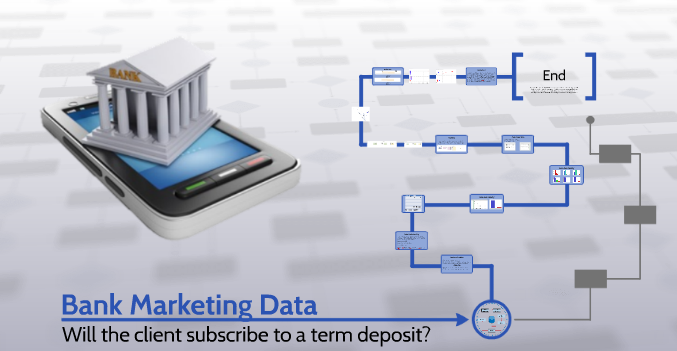

## Importing the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the datasets using pandas and view part of the data

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [3]:
df.describe() #shows the details of the numerical features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.info()  #datatypes and checking missing values in all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
columns = df.columns

In [6]:
unique_v = {}
for col in columns:
    unique_v[col] = df[col].unique()
unique_v.keys()

dict_keys(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'])

In [7]:
unique_v['previous'] #shows the unique values in column named previous

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [8]:
['job','marital','education','default','housing','loan','poutcome','']

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', '']

In [9]:
(df=='unknown').astype('int').sum() #here "unknown" is the missing data, checking the number of unknown in each column

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [10]:
(df=='nonexistent').astype('int').sum()  #to confirm if "nonexistent" is also a missing value or not

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35563
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [11]:
(df['previous']>= 6).astype('int').sum()

6

In [12]:
df.describe()  #notice that pdays column 25,50,75 percentile and max is same value, in that case it will be removed from our feature

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df['cons.conf.idx'] #consumer confidence index

0       -36.4
1       -36.4
2       -36.4
3       -36.4
4       -36.4
         ... 
41183   -50.8
41184   -50.8
41185   -50.8
41186   -50.8
41187   -50.8
Name: cons.conf.idx, Length: 41188, dtype: float64

In [14]:
df['previous'].unique() #consumer price index

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

(array([ 4176.,  9515.,  2292.,     0.,  6045.,  5243.,     0.,  1731.,
        12168.,    18.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

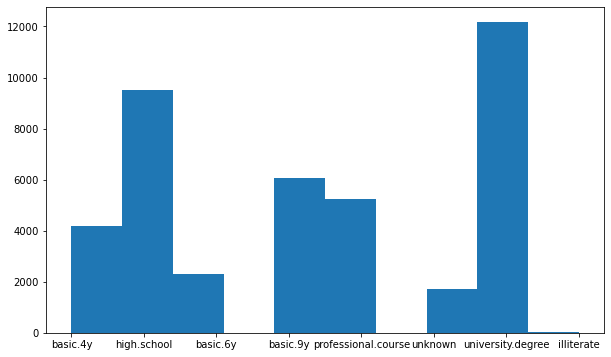

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df.education)

(array([ 5029., 10422.,  9254.,  6743.,  1720.,  2924.,  1014.,  1421.,
          330.,  2331.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

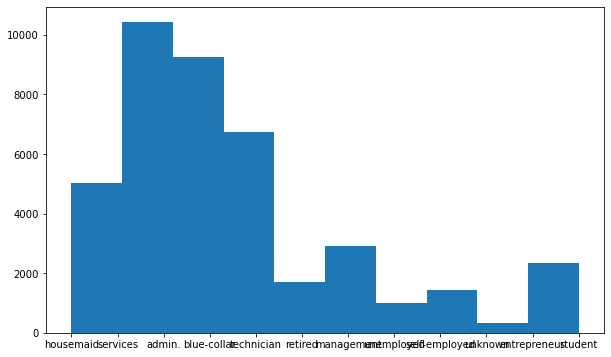

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df.job)

(array([24928.,     0.,     0., 11568.,     0.,     0.,  4612.,     0.,
            0.,    80.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

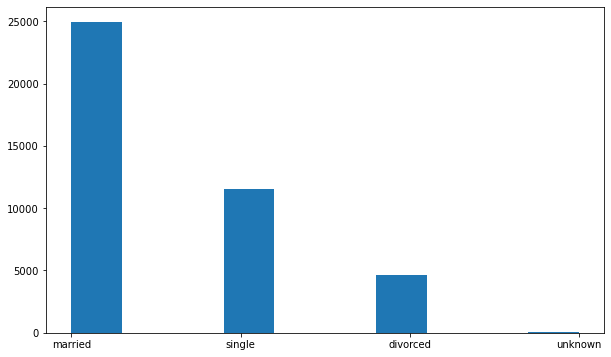

In [17]:
plt.figure(figsize=(10,6))
plt.hist(df.marital)

(array([13769.,  5318.,  7174.,  6178.,   718.,  4101.,   182.,   546.,
         2632.,   570.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

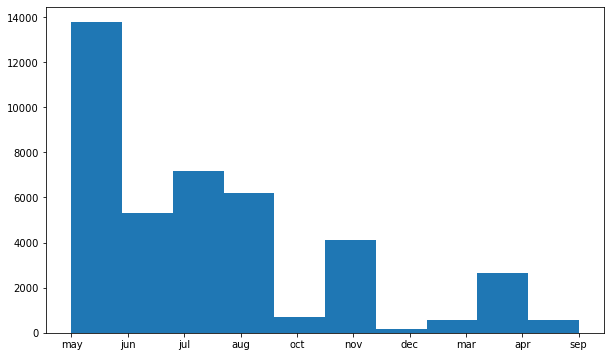

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df.month)

In [19]:
(df.month == 'mar').astype('int').sum()

546

(array([8514.,    0., 8090.,    0.,    0., 8134.,    0., 8623.,    0.,
        7827.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

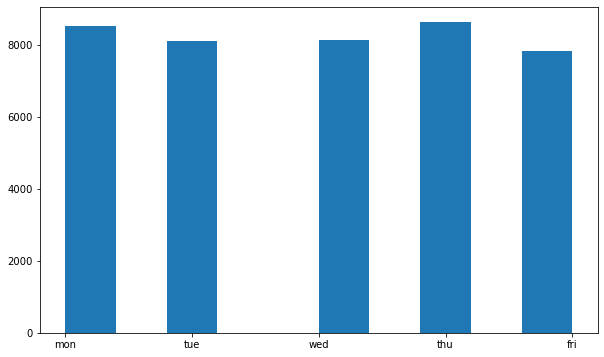

In [20]:
plt.figure(figsize=(10,6))
plt.hist(df.day_of_week)

(array([3.5563e+04, 4.5610e+03, 7.5400e+02, 0.0000e+00, 2.1600e+02,
        7.0000e+01, 0.0000e+00, 1.8000e+01, 5.0000e+00, 1.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

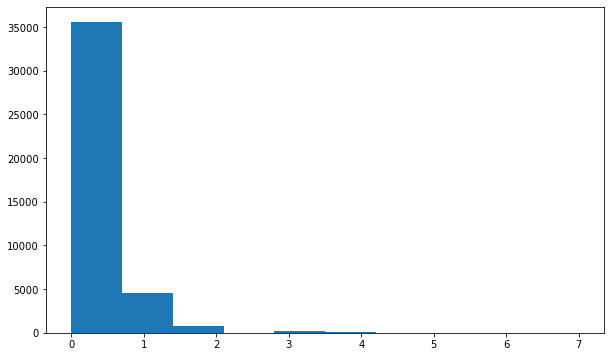

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df.previous)

<BarContainer object of 41188 artists>

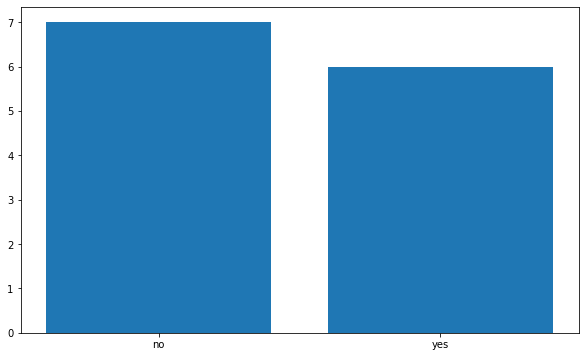

In [94]:
plt.figure(figsize=(10,6))
plt.bar(df.y,df.previous)

In [95]:
snsbarplot

<module 'seaborn' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

### Slicing out Dataset to be used for the model

In [22]:
features = ['age','marital','education','default','housing','loan','contact','month','day_of_week','campaign','previous','emp.var.rate','cons.price.idx','euribor3m' , 'nr.employed', 'y']

In [23]:
new_df = df[features]

## Building Random Forest Model
* importing scikit-learn libraries
* splitting the datasets into train and test
* Tuning the parameters to find the best model
* Cross validation
* Choosing the Best model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer

> spliting the datasets into train and test

In [25]:
df_full_train, df_test = train_test_split(new_df,test_size=0.2,random_state=1)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [26]:
df_train.shape[0],df_val.shape[0],df_test.shape[0]

(24712, 8238, 8238)

In [27]:
df_train['y'].value_counts() #checking the value counts

no     21954
yes     2758
Name: y, dtype: int64

In [28]:
df_val['y'].value_counts()

no     7300
yes     938
Name: y, dtype: int64

In [29]:
df_test['y'].value_counts()

no     7294
yes     944
Name: y, dtype: int64

In [30]:
df_train = df_train.reset_index(drop=True)  # resetting the index values for the train, val and test dataframe
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
y_train = (df_train['y'] == 'no').astype('int').values  #slicing out the target value
y_val = (df_val['y'] == 'no').astype('int').values
y_test = (df_test['y'] == 'no').astype('int').values

In [32]:
df_train = df_train.drop('y',axis=1) #dropping the target value from the rest of the dataframe
df_val = df_val.drop('y',axis=1)
df_test = df_test.drop('y',axis=1)

In [33]:
df_train = df_train.replace('unknown',np.nan)  #replacing the "unknown" value with NaN
df_val = df_val.replace('unknown',np.nan)
df_test = df_test.replace('unknown',np.nan)

In [34]:
(df_train.fillna(method='bfill',limit=20).isnull()).astype('int').sum()  #dealing with NaN value

age               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
euribor3m         0
nr.employed       0
dtype: int64

In [35]:
df_test['default']

0       NaN
1       NaN
2        no
3        no
4        no
       ... 
8233     no
8234    NaN
8235     no
8236    NaN
8237     no
Name: default, Length: 8238, dtype: object

In [36]:
df_train = df_train.fillna(method='bfill',limit=20) #using backwards fill to deal with missing values

In [37]:
train_dict = df_train.to_dict(orient='records')  #Performing Dictvector transform
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_train

array([[3.6000e+01, 1.0000e+00, 9.2893e+01, ..., 0.0000e+00, 5.0991e+03,
        0.0000e+00],
       [2.5000e+01, 1.0000e+00, 9.4199e+01, ..., 1.0000e+00, 4.9636e+03,
        0.0000e+00],
       [2.8000e+01, 2.0000e+00, 9.3075e+01, ..., 0.0000e+00, 5.0991e+03,
        0.0000e+00],
       ...,
       [3.4000e+01, 1.0000e+00, 9.3075e+01, ..., 0.0000e+00, 5.0991e+03,
        1.0000e+00],
       [4.6000e+01, 1.0000e+00, 9.3075e+01, ..., 0.0000e+00, 5.0991e+03,
        0.0000e+00],
       [3.9000e+01, 1.0000e+00, 9.3200e+01, ..., 0.0000e+00, 5.1958e+03,
        0.0000e+00]])

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
def dict_transform(df):  #function to handle missing value and Dictvector transform
    df = df.fillna(method='bfill',limit=20)
    df_dict = df.to_dict(orient='records')
    new_df = dv.transform(df_dict)
    return new_df

In [40]:
X_val = dict_transform(df_val)

In [41]:
y_pred = rf.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print('Train: ',auc)


y_pred = rf.predict_proba(X_val)[:,1]

auc = roc_auc_score(y_val,y_pred)
print('Val: ',auc)

Train:  0.9997079561768119
Val:  0.7487473347547976


### Parameter Tuning

> Max_depth parameter

In [42]:
#performing max_depth parameter tuning on random forest
scores = []
for d  in [1,3,4,5,8,10,15,20,30,50,100]:
    rf = RandomForestClassifier(max_depth=d,random_state=1)
    rf.fit(X_train,y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    scores.append((d,auc))
df_scores = pd.DataFrame(scores,columns=['max_depth','auc'])
df_scores.head(10)

,max_depth,auc
0,1,0.771631
1,3,0.780543
2,4,0.783945
3,5,0.784174
4,8,0.790294
5,10,0.789603
6,15,0.779510
7,20,0.762550
8,30,0.741347
9,50,0.744622


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_depth', ylabel='auc'>

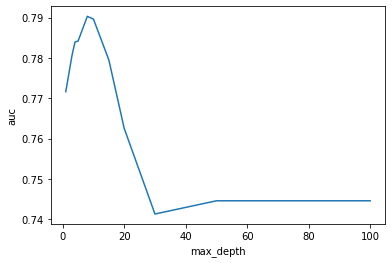

In [43]:
sns.lineplot(df_scores.max_depth,df_scores.auc)

> n_estimator parameter

In [44]:
#performing max_depth and n_estimators parameter tuning on random forest
scores = []
for d in [5,8,10,11,13,15]:
    for n  in [1,3,4,5,8,10,15,20,30,50,100,150,200]:
        rf = RandomForestClassifier(n_estimators=n,max_depth=d,random_state=1)
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((d,n,auc))
df_scores = pd.DataFrame(scores,columns=['max_depth','n_est','auc'])
df_scores.head(10)

,max_depth,n_est,auc
0,5,1,0.762957
1,5,3,0.780381
2,5,4,0.778860
3,5,5,0.778367
4,5,8,0.780068
5,5,10,0.781481
6,5,15,0.781726
7,5,20,0.782952
8,5,30,0.783249
9,5,50,0.783464


<AxesSubplot:xlabel='n_est', ylabel='max_depth'>

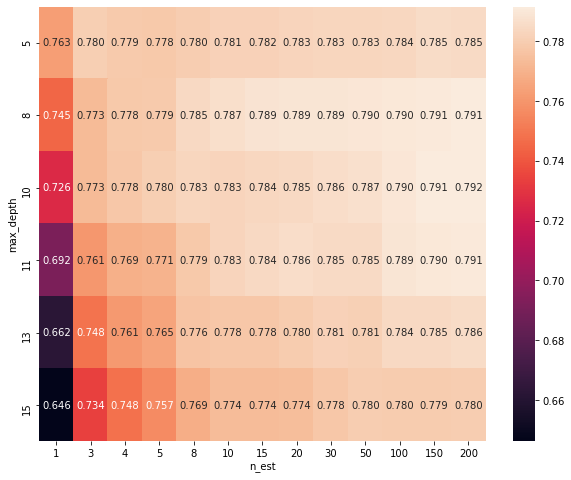

In [45]:
df_pivot = df_scores.pivot(index='max_depth',columns='n_est',values='auc')
plt.figure(figsize=(10,8))
sns.heatmap(df_pivot,annot=True,fmt='.3f')

> Order of feature importance

In [46]:
# rf.feature_importances_()
attributes = list(dv.get_feature_names())

sorted(zip(np.round(rf.feature_importances_,30), attributes), reverse=True)

[(0.17451706742757897, 'euribor3m'),
 (0.14591649417326527, 'age'),
 (0.1137375201194346, 'nr.employed'),
 (0.06483965157834003, 'campaign'),
 (0.05424829949753401, 'emp.var.rate'),
 (0.05099250753603349, 'cons.price.idx'),
 (0.04274846019376169, 'previous'),
 (0.01900162491091414, 'housing=no'),
 (0.018894657945806782, 'education=university.degree'),
 (0.01859802173200807, 'housing=yes'),
 (0.016664156637236457, 'marital=married'),
 (0.016267966374956276, 'education=high.school'),
 (0.015727801046867128, 'marital=single'),
 (0.01475967353191532, 'day_of_week=mon'),
 (0.014431060878540505, 'day_of_week=wed'),
 (0.013916702780932187, 'day_of_week=tue'),
 (0.013903269096121627, 'loan=no'),
 (0.0138965934404735, 'day_of_week=thu'),
 (0.013554069792065448, 'education=professional.course'),
 (0.013485005706600764, 'loan=yes'),
 (0.013275703955536892, 'day_of_week=fri'),
 (0.012747151297821358, 'month=oct'),
 (0.01246095913087233, 'contact=telephone'),
 (0.012345075153892117, 'month=may'),
 

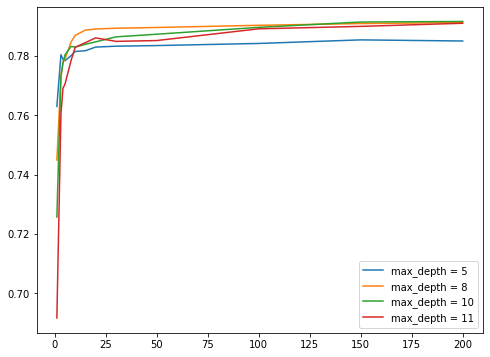

In [47]:
plt.figure(figsize=(8,6))
for d in [5,8,10,11]:
    df_subset = df_scores[df_scores.max_depth ==d]
    plt.plot(df_subset.n_est,df_subset.auc,label ='max_depth = %d'%d)
plt.legend()


> min_sample_leaf parameter tuning

In [49]:
#performing n_estimators and min_samples_leaf parameter tuning on random forest
scores = []
for n in [10,11,15,20,30,50,100,150,200,250]:
    for s  in [1,3,4,5,8,10,15,20,30,50,100,150,200]:
        rf = RandomForestClassifier(n_estimators=n,max_depth=10,min_samples_leaf=s,random_state = 1)
        rf.fit(X_train,y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        scores.append((n,s,auc))
df_scores = pd.DataFrame(scores,columns=['n_est','min_leaf','auc'])
df_scores.head()

,n_est,min_leaf,auc
0,10,1,0.782939
1,10,3,0.784834
2,10,4,0.788853
3,10,5,0.788506
4,10,8,0.782381


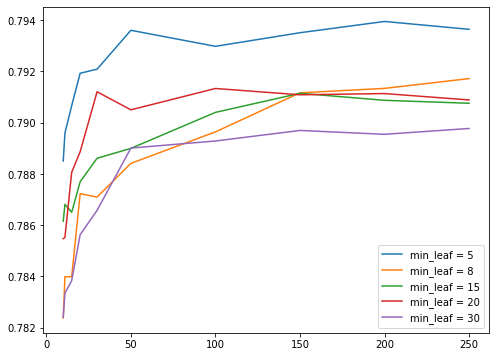

In [50]:
plt.figure(figsize=(8,6))
for s in [5,8,15,20,30]:
    df_subset = df_scores[df_scores.min_leaf ==s]
    plt.plot(df_subset.n_est,df_subset.auc,label ='min_leaf = %d'%s)
plt.legend()

## Choosing the best model

In [51]:
rf = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf=5,random_state = 1)
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [52]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7939498933901918

### Fulltrain Cross validation using Kfold
* The train and validation set are combined
* Randomly splitted, trained and validated 

In [53]:
df_full_train.head() #performing training on the full dataset 

,age,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
32694,30,married,basic.6y,unknown,yes,no,cellular,may,mon,1,0,-1.8,92.893,1.299,5099.1,no
39374,58,married,high.school,no,yes,no,telephone,mar,mon,4,0,-1.8,93.369,0.635,5008.7,no
13543,32,divorced,basic.9y,no,no,no,cellular,jul,thu,1,0,1.4,93.918,4.963,5228.1,no
37649,26,single,university.degree,no,yes,no,telephone,aug,tue,1,1,-2.9,92.201,0.859,5076.2,yes
13150,48,married,basic.4y,no,yes,no,cellular,jul,wed,1,0,1.4,93.918,4.962,5228.1,no


In [54]:
(df_full_train.y == 'no').astype('int').values

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
df_full_train.y.values

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [68]:
features.pop() #removing the target value from the list
new_f = features

In [69]:
new_f

['age',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'euribor3m',
 'nr.employed']

In [70]:
def rf_train(df_train,y_train): #Random forest training function
    train_dict = df_train[new_f].to_dict(orient='records')
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(train_dict)
    
    rf = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf=5,random_state = 1)
    rf_model = rf.fit(X_train,y_train)
    return dv, rf_model

In [71]:
def rf_predict(df,dv,model):  #Random forest predict function
    df_dict = df[new_f].to_dict(orient='records')
    X = dv.transform(df_dict)
    
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [72]:
from sklearn.model_selection import KFold

In [73]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [74]:
t_i, v_i = next(kfold.split(df_full_train))

In [75]:
!pip install tqdm

In [76]:
from tqdm.auto import tqdm

In [77]:
cv_scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = (df_train.y == 'no').astype('int').values
    y_val = (df_val.y == 'no').astype('int').values
    
    dv, rf_model = rf_train(df_train,y_train)
    y_pred = rf_predict(df_val,dv,rf_model)
    auc = roc_auc_score(y_val, y_pred)
    cv_scores.append(auc)    

In [78]:
cv_scores

[0.8088689865876617,
 0.7884249698499056,
 0.7772837305172178,
 0.8059189426574243,
 0.7883805926497968,
 0.7802667843428712,
 0.8101273747841106,
 0.8043815890340258,
 0.7945763768010492,
 0.7914040316571682]

In [79]:
np.mean(cv_scores)

0.7949633378881231

## Saving the Random forest Model

In [80]:
dv, rf_model = rf_train(df_train,y_train)

In [81]:
pd.to_pickle((dv,rf_model),'rf_model.bin')

## Reading the Model

In [82]:
dv1,rf_model1 = pd.read_pickle('rf_model.bin')

In [83]:
dv1,rf_model1

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                        random_state=1))

In [84]:
val_df = df_val.fillna(method='bfill',limit=20)
val_dict = val_df.to_dict(orient='records')
X_val = dv1.transform(val_dict)


# X_val = dv1.transform(df_val)
y_pred = rf_model1.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7914040316571682

## Making Predictions with the model

In [85]:
profile = {}
for f in new_f:
    profile[f] = ""

In [88]:
profile = {"age": 40,
    "marital": "married",
    "education": "university.degree",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "oct",
    "day_of_week": "fri",
    "campaign": 3,
    "previous": 1,
    "emp.var.rate": 1,
    "cons.price.idx": 93.45,
    "euribor3m": 2.567,
    "nr.employed": 5567
    }

In [89]:
profile['euribor3m'] = 1.567

In [90]:
profile

{'age': 40,
 'marital': 'married',
 'education': 'university.degree',
 'default': 'no',
 'housing': 'yes',
 'loan': 'no',
 'contact': 'cellular',
 'month': 'oct',
 'day_of_week': 'fri',
 'campaign': 3,
 'previous': 1,
 'emp.var.rate': 1,
 'cons.price.idx': 93.45,
 'euribor3m': 1.567,
 'nr.employed': 5567}

In [91]:
# dict_
Xy = dv1.transform([profile])

In [92]:
rf_model1.predict_proba(Xy)[:,1]

array([0.70156334])